In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import silhouette_score, homogeneity_score
from sklearn.neighbors import kneighbors_graph
from sklearn.feature_selection import f_classif, SelectKBest, SequentialFeatureSelector
from sklearn.metrics import confusion_matrix, silhouette_score, homogeneity_score
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.svm import SVC

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/all_BS2_1.csv', engine='python')

In [5]:
data.shape

(12146, 30703)

In [6]:
data = data.drop(data.columns[[0,2,3,-1]], axis=1)

In [7]:
klase = data.iloc[:, 0].apply(lambda x: re.sub(r'_\d+$', '', x))

In [8]:
klase.to_csv('klase.csv', index=False)

In [9]:
oznake_klasa = {
"BC": 0,    
"DC": 1,   
"MC": 2,
"NK": 3, 
"TC": 4,
}

oznake_klasa_grupisane = {
"BC": 0,    
"DC": 1,   
"MC": 2,
"NK": 3, 
"TC": 4,
}

klase = klase.replace(oznake_klasa)

In [10]:
set(klase)

{0, 1, 2, 3, 4}

In [11]:
klase.shape

(12146,)

In [12]:
X = data

In [13]:
X['Cell_type'] = X['Cell_type'].apply(lambda x: 0 if x == 'BC' else x)
X['Cell_type'] = X['Cell_type'].apply(lambda x: 1 if x == 'DC' else x)
X['Cell_type'] = X['Cell_type'].apply(lambda x: 2 if x == 'MC' else x)
X['Cell_type'] = X['Cell_type'].apply(lambda x: 3 if x == 'NK' else x)
X['Cell_type'] = X['Cell_type'].apply(lambda x: 4 if x == 'TC' else x)

In [14]:
variances = X.var()
print(variances)
print(f'Mean: {variances.mean()}')
print(f'Median: {variances.median()}')
print(f'Min: {variances.min()}')
print(f'Max: {variances.max()}')

Cell_type          2.226705
hg38_ZFP41         0.002137
hg38_ASF1A         0.074015
hg38_TMEM39A       0.035085
hg38_OR2M7         0.000000
                     ...   
hg38_TPH2          0.000905
hg38_LINC00626     0.000000
hg38_LRRC29        0.003039
hg38_AC073333.8    0.000082
hg38_ZFP36         0.669135
Length: 30699, dtype: float64
Mean: 0.038123135479611533
Median: 0.0016440565950823249
Min: 0.0
Max: 2.587398569226056


In [15]:
vt = VarianceThreshold(threshold=0.05)
X_vt_1 = vt.fit_transform(X)

In [16]:
X_vt_1_df = pd.DataFrame(data=X_vt_1)
X_vt_1_df.to_csv('X_vt_1.csv', index=False)

In [17]:
X_vt_1.T.var().min()

0.3645534092874025

In [18]:
X_vt_1.shape

(12146, 5777)

In [19]:
X_vt_1_graph = kneighbors_graph(
    X_vt_1, 
    n_neighbors=150, 
    mode='distance', 
    metric='cosine',
    n_jobs=-1
)

X_vt_1_graph_map = kneighbors_graph(
    X_vt_1, 
    n_neighbors=150, 
    mode='connectivity', 
    metric='cosine',
    n_jobs=-1
)

In [20]:
X_vt_1_graph_arr = X_vt_1_graph.toarray()
X_vt_1_graph_map_arr = X_vt_1_graph_map.toarray()
X_vt_1_graph_full = X_vt_1_graph_arr

X_vt_1_graph_full = 1.0 / (1.0 + X_vt_1_graph_arr)

In [21]:
X_vt_1_graph_full[X_vt_1_graph_map_arr == 0] = 0

In [ ]:
ac = AgglomerativeClustering(
    n_clusters=5, 
    affinity='cosine', 
    linkage='average'
)
fitted_model = ac.fit(X_vt_1)

In [ ]:
silhouette_score(X_vt_1, labels=ac.labels_, metric='cosine')

0.4264681221573142

In [ ]:
homogeneity_score(klase.values.ravel(), ac.labels_)

0.0004277631484224988

In [ ]:
labels = ac.fit_predict(X_vt_1_graph_full)

In [ ]:
labels.shape

(12146,)

In [ ]:
set(labels)

{0, 1, 2, 3, 4}

In [ ]:
X_vt_1_df

,0,1,2,3,4,5,6,7,8,9,...,5767,5768,5769,5770,5771,5772,5773,5774,5775,5776
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12141,4,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
12142,4,0,0,0,0,1,0,0,1,0,...,0,1,0,0,1,1,0,0,1,2
12143,4,0,0,0,0,0,1,0,0,0,...,0,0,0,0,2,0,0,0,0,2
12144,4,0,1,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
pocetne_klase = X_vt_1_df[0]

In [ ]:
dodeljene_klase = labels

In [ ]:
tabela = pd.DataFrame({'pocetne_klase': pocetne_klase, 'klasteri': dodeljene_klase})

In [ ]:
tabela

,pocetne_klase,klasteri
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
12141,4,0
12142,4,0
12143,4,0
12144,4,0


In [ ]:
tabela.to_csv('tabela_hijerarhijsko_rez.csv', index=False)

In [ ]:
matches = (tabela['pocetne_klase'] == tabela['klasteri']).sum()

In [ ]:
matches / tabela['pocetne_klase'].count()

0.15420714638564137

In [22]:
# Koristi se PCA samo radi grafickog prikaza klastera

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_vt_1)

In [139]:
sc = SpectralClustering(
    n_clusters=5, 
    affinity='precomputed_nearest_neighbors', 
    n_components=5
)
fitted_model_2 = sc.fit(X_vt_1_graph_full)

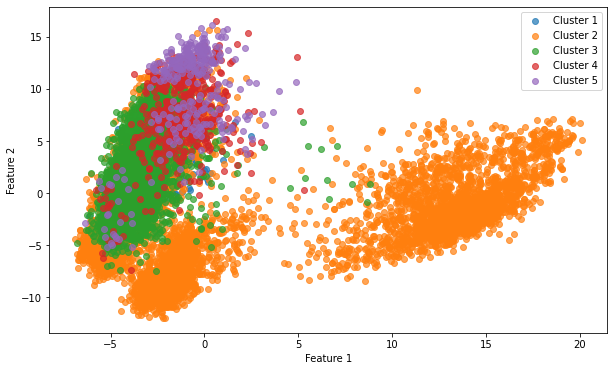

In [140]:
labels = fitted_model_2.labels_
fig, ax = plt.subplots(figsize=(10,6))

for cluster_label in np.unique(labels):

  idx = np.where(labels == cluster_label)[0]

  ax.scatter(X_reduced[idx, 0], X_reduced[idx, 1], label = f'Cluster {cluster_label + 1}', alpha = 0.7)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend()

plt.show()

In [141]:
silhouette_score(X_vt_1, labels=sc.labels_, metric='cosine')

-0.05069742263695805

In [142]:
homogeneity_score(klase.values.ravel(), sc.labels_)

0.2194744030679946

In [143]:
labels = sc.fit_predict(X_vt_1_graph_full)

In [29]:
labels.shape

(12146,)

In [30]:
labels

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
X_vt_1_df

,0,1,2,3,4,5,6,7,8,9,...,5767,5768,5769,5770,5771,5772,5773,5774,5775,5776
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12141,4,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
12142,4,0,0,0,0,1,0,0,1,0,...,0,1,0,0,1,1,0,0,1,2
12143,4,0,0,0,0,0,1,0,0,0,...,0,0,0,0,2,0,0,0,0,2
12144,4,0,1,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [144]:
pocetne_klase = X_vt_1_df[0]

In [145]:
dodeljene_klase = labels

In [146]:
tabela = pd.DataFrame({'pocetne_klase': pocetne_klase, 'klasteri': dodeljene_klase})

In [ ]:
tabela

,pocetne_klase,klasteri
0,0,3
1,0,3
2,0,3
3,0,3
4,0,3
...,...,...
12141,4,1
12142,4,1
12143,4,1
12144,4,1


In [ ]:
tabela.to_csv('tabela_spektralno_rez.csv', index=False)

In [147]:
matches = (tabela['pocetne_klase'] == tabela['klasteri']).sum()

In [148]:
matches / tabela['pocetne_klase'].count()

0.1912563807014655